In [19]:
import nltk
nltk.download('punkt')       # For tokenization
nltk.download('stopwords')   # (Optional) For stopword filtering


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91977\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91977\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [21]:
df_review = pd.read_csv('../data/external/googleplaystore_user_reviews.csv')
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [22]:
df_review = df_review.dropna(subset=['Translated_Review'])

In [23]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_review['Sentiment_Score'] = df_review['Translated_Review'].apply(get_sentiment)

In [24]:
def categorize(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_review['Sentiment_Label'] = df_review['Sentiment_Score'].apply(categorize)

In [26]:
df_review.to_csv('../data/processed/cleaned_reviews.csv', index=False)

C:\Users\91977\AppData\Local\Temp\ipykernel_14296\3640635046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_Label', data=df_review, palette='viridis')


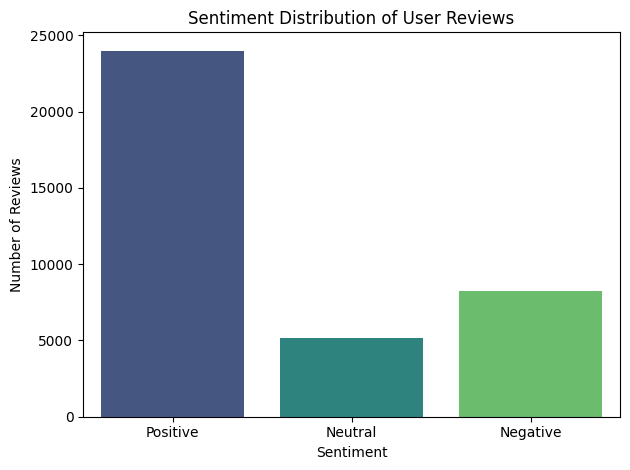

In [25]:
sns.countplot(x='Sentiment_Label', data=df_review, palette='viridis')
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()

# Save the plot
import os
os.makedirs('../output/figures', exist_ok=True)
plt.savefig('../output/figures/user_review_sentiment.png')
plt.show()